# Testing/Benchmarking Celltypist Models 
### List of Models (made in Making New Models.ipynb)
1. Remove the feature selection from CellTypist (so it only trains the model once)
2. Train the model with L1 regularization instead of L2
3. Train the model only once with only Cytopus genes
4. At the feature selection step, make sure the Cytopus genes are included in the list of top genes

In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad
from anndata import AnnData
import numpy as np
from scipy.sparse import spmatrix
from datetime import datetime
import itertools
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from typing import Optional
import plotly.graph_objects as go

#import celltypist as ct
#from celltypist import models

from  annotate import annotate

In [ ]:
#Import models 
##Celltypist default model 
models.download_models(model = 'Immune_All_Low.pkl')

##New Models
model_1 = models.Model.load('New Models/CT_45 Models/ct_model_1.pkl')
model_2 = models.Model.load('New Models/CT_45 Models/ct_model_2.pkl')
model_3 = models.Model.load('New Models/CT_45 Models/ct_model_3.pkl')
model_4 = models.Model.load('New Models/CT_45 Models/ct_model_4.pkl')

In [ ]:
models.download_models(model = 'Healthy_COVID19_PBMC.pkl')

## Get celltype predictions from each model

### Using CT_45 Models

In [6]:
#Import test data - subset of Celltypist data 
test= ad.read('/data/peer/adamsj5/cell_typing/CT_45_Test.h5ad')

In [8]:
predictions_ct = annotate(test, model = 'New Models/CT_45 Models/ct_model_0.pkl', majority_voting = True)
predictions_ct.predicted_labels

ah


🔬 Input data has 230834 cells and 36601 genes
🔗 Matching reference genes in the model
🧬 4352 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
/home/adamsj5/miniconda3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/adamsj5/miniconda3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to Tru

,predicted_labels,over_clustering,majority_voting
CZINY-0055_TCATTCAGTGACTGTT,Tnaive/CM_CD4,194,Tnaive/CM_CD4
CZINY-0098_TGGGCGTGTCTAACGT,Alveolar macrophages,57,Alveolar macrophages
CZINY-0104_CGGAATTTCGTCGGGT,Tnaive/CM_CD4,227,Teffector/EM_CD4
CZI-IA10471910+CZI-IA10472006_GATGAAACATCGGACC,Naive B cells,6,Naive B cells
Pan_T7935491_GTCAAGTAGAGAACAG,Naive B cells,114,Naive B cells
...,...,...,...
CZINY-0110_GAGCTGCAGGGTGAGG,Alveolar macrophages,79,Alveolar macrophages
CZI-IA10466281+CZI-IA10466377_TACTCGCCACCCATGG,Tnaive/CM_CD4,16,Tnaive/CM_CD4
CZINY-0097_AAAGAACAGTCTACCA,Tnaive/CM_CD4,112,Tfh
Pan_T8010331_TACACGAGTAAGTTCC,Memory B cells,319,Memory B cells


In [9]:
pred_adatact = predictions_ct.to_adata()
pred_adatact.write_h5ad('/data/peer/adamsj5/cell_typing/pred_modelct.h5ad')

Model 1

In [ ]:
predictions_1 = annotate(test, model = 'New Models/CT_45 Models/ct_model_1.pkl', majority_voting = True)
predictions_1.predicted_labels

In [ ]:
pred_adata1 = predictions_1.to_adata()
pred_adata1.write_h5ad('/data/peer/adamsj5/cell_typing/pred_model1.h5ad')

Model 2

In [127]:
predictions_2 = annotate(test, model = 'New Models/CT_45 Models/ct_model_2.pkl', majority_voting = True)
predictions_2.predicted_labels

ah


🔬 Input data has 230834 cells and 36601 genes
🔗 Matching reference genes in the model
🧬 6807 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 30
🗳️ Majority voting the predictions
✅ Majority voting done!


,predicted_labels,over_clustering,majority_voting
CZINY-0055_TCATTCAGTGACTGTT,Tnaive/CM_CD4,194,Tnaive/CM_CD4
CZINY-0098_TGGGCGTGTCTAACGT,Alveolar macrophages,57,Alveolar macrophages
CZINY-0104_CGGAATTTCGTCGGGT,Tfh,227,Teffector/EM_CD4
CZI-IA10471910+CZI-IA10472006_GATGAAACATCGGACC,Naive B cells,6,Naive B cells
Pan_T7935491_GTCAAGTAGAGAACAG,Naive B cells,114,Naive B cells
...,...,...,...
CZINY-0110_GAGCTGCAGGGTGAGG,Alveolar macrophages,79,Alveolar macrophages
CZI-IA10466281+CZI-IA10466377_TACTCGCCACCCATGG,Tnaive/CM_CD4,16,Tnaive/CM_CD4
CZINY-0097_AAAGAACAGTCTACCA,Tnaive/CM_CD4,112,Tfh
Pan_T8010331_TACACGAGTAAGTTCC,Memory B cells,319,Memory B cells


In [128]:
pred_adata2 = predictions_2.to_adata()

In [3]:
#pred_adata2.write_h5ad('../../pred_model2.h5ad')

pred_adata2= ad.read('/data/peer/adamsj5/cell_typing/pred_model2.h5ad')

Model 3

In [ ]:
predictions_3 = annotate(test, model = 'New Models/CT_45 Models/ct_model_3.pkl', majority_voting = True)
predictions_3.predicted_labels

In [ ]:
pred_adata3 = predictions_3.to_adata()

In [ ]:
#pred_adata3.write_h5ad('../../pred_model3.h5ad')
pred_adata3= ad.read('/data/peer/adamsj5/cell_typing/pred_model3.h5ad')

Model 4

In [ ]:
predictions_4 = annotate(test, model = 'New Models/CT_45 Models/ct_model_4.pkl', majority_voting = True)
predictions_4.predicted_labels

In [ ]:
pred_adata4 = predictions_4.to_adata()

In [ ]:
#pred_adata4.write_h5ad('../../pred_model4.h5ad')
pred_adata4= ad.read('/data/peer/adamsj5/cell_typing/pred_model4.h5ad')

### Using CT_98 Models

In [ ]:
#Import test data - subset of CT_98 data 
test_98= ad.read('../../Data/CT_98_Test.h5ad')

Model 1

In [ ]:
predictions_98_0 = ct.annotate(test_98, model = 'New Models/CT_98 Models/98_model_0.pkl', majority_voting = True)
#predictions_4.predicted_labels
pred_adata98_0 = predictions_98_0.to_adata()
pred_adata98_0.write_h5ad('../../predictions/pred_98_model0.h5ad')

Model 2

In [ ]:
predictions_98_2 = ct.annotate(test_98, model = 'New Models/CT_98 Models/98_model_2.pkl', majority_voting = True)
#predictions_4.pif x in genes:redicted_labels
pred_adata98_2 = predictions_98_2.to_adata()
pred_adata98_2.write_h5ad('../../predictions/pred_98_model2.h5ad')

Model 3

In [ ]:
predictions_98_3 = ct.annotate(test_98, model = 'New Models/CT_98 Models/98_model_3.pkl', majority_voting = True)
#predictions_4.predicted_labels
pred_adata98_3 = predictions_98_3.to_adata()
pred_adata98_3.write_h5ad('../../predictions/pred_98_model3.h5ad')

Model 4

In [ ]:
predictions_98_4 = ct.annotate(test_98, model = 'New Models/CT_98 Models/98_model_4.pkl', majority_voting = True)
#predictions_4.predicted_labels
pred_adata98_4 = predictions_98_4.to_adata()
pred_adata98_4.write_h5ad('../../predictions/pred_98_model4.h5ad')

### Using COV_PBMC Models

In [ ]:
#Import test data - subset of CT_98 data 
test_COV= ad.read('../../Data/test_COV.h5ad')
#test_COV_cp = ad.read('../../Data/test_COV_cp.h5ad')

Model 0

In [ ]:
predictions_COV_0 = ct.annotate(test_COV, model = 'New Models/COV_PBMC Models/COV_model_0.pkl', majority_voting = True)
#predictions_4.predicted_labels
pred_adataCOV_0 = predictions_COV_0.to_adata()
pred_adataCOV_0.write_h5ad('../../predictions/pred_COV_model0.h5ad')

Model 2

In [ ]:
predictions_COV_2 = ct.annotate(test_COV, model = 'New Models/COV_PBMC Models/COV_model_2.pkl', majority_voting = True)
#predictions_4.predicted_labels
pred_adataCOV_2 = predictions_COV_2.to_adata()
pred_adataCOV_2.write_h5ad('../../predictions/pred_COV_model2.h5ad')

Model 3

In [ ]:
predictions_COV_3 = ct.annotate(test_COV, model = 'New Models/COV_PBMC Models/COV_model_3.pkl', majority_voting = True)
#predictions_COV_4.predicted_labels
pred_adataCOV_3 = predictions_COV_3.to_adata()
pred_adataCOV_3.write_h5ad('../../predictions/pred_COV_model3.h5ad')

In [ ]:
#making sure the f1 score is the same if we use dataset with all genes vs just cytopus genes 
#predictions_COV_cp_3 = ct.annotate(test_COV_cp, model = 'New Models/COV_PBMC Models/COV_model_3.pkl', majority_voting = True)
#predictions_COV_3.predicted_labels
#pred_adataCOV_cp_3 = predictions_COV_cp_3.to_adata()
#pred_adataCOV_cp_3.write_h5ad('../../predictions/pred_COV_cp_model3.h5ad')

Model 4

In [ ]:
predictions_COV_4 = ct.annotate(test_COV, model = 'New Models/COV_PBMC Models/COV_model_4.pkl', majority_voting = True)
#predictions_4.predicted_labels
pred_adataCOV_4 = predictions_COV_4.to_adata()
pred_adataCOV_4.write_h5ad('../../predictions/pred_COV_model4.h5ad')

### Using Glasner Models

In [29]:
#Import test data 
test_g= ad.read('/data/peer/adamsj5/cell_typing/test_glas.h5ad') #lilac location

Model 0

In [5]:
predictions_g_0 = annotate(test_g, model = 'New Models/Glasner Models/g_model_0.pkl', majority_voting = True)
pred_adatag_0 = predictions_g_0.to_adata()
pred_adatag_0.write_h5ad('/data/peer/adamsj5/cell_typing/pred_g_model0.h5ad')

ah


👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will try the `.raw` attribute
🛑 Invalid expression matrix in both `.X` and `.raw.X`, expect log1p normalized expression to 10000 counts per cell
⚠️ Warning: invalid expression matrix, expect all genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 24898 cells and 25944 genes
🔗 Matching reference genes in the model
🧬 3661 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


In [42]:
predictions_g_0.predicted_labels["predicted_labels"].equals(predictions_g_2.predicted_labels["predicted_labels"])

False

In [22]:
len(np.unique(predictions_g_0.predicted_labels["predicted_labels"]))

19

Model 2

In [61]:
predictions_g_2 = annotate(test_g, model = 'New Models/Glasner Models/g_model_2.pkl', majority_voting = True)
pred_adatag_2 = predictions_g_2.to_adata()
pred_adatag_2.write_h5ad('/data/peer/adamsj5/cell_typing/pred_g_model2.h5ad')

👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will try the `.raw` attribute
🛑 Invalid expression matrix in both `.X` and `.raw.X`, expect log1p normalized expression to 10000 counts per cell
⚠️ Warning: invalid expression matrix, expect all genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 24898 cells and 25944 genes
🔗 Matching reference genes in the model


ah


🧬 4128 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


Model 3

In [65]:
predictions_g_3 = annotate(test_g, model = 'New Models/Glasner Models/g_model_3.pkl', majority_voting = True)
pred_adatag_3 = predictions_g_3.to_adata()
pred_adatag_3.write_h5ad('/data/peer/adamsj5/cell_typing/pred_COV_model3.h5ad')

👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will try the `.raw` attribute
🛑 Invalid expression matrix in both `.X` and `.raw.X`, expect log1p normalized expression to 10000 counts per cell
⚠️ Warning: invalid expression matrix, expect all genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 24898 cells and 25944 genes
🔗 Matching reference genes in the model


ah


🧬 304 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


Model 4

In [67]:
predictions_g_4 = annotate(test_g, model = 'New Models/Glasner Models/g_model_4.pkl', majority_voting = True)
pred_adatag_4 = predictions_g_4.to_adata()
pred_adatag_4.write_h5ad('/data/peer/adamsj5/cell_typing/pred_COV_model4.h5ad')

👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will try the `.raw` attribute
🛑 Invalid expression matrix in both `.X` and `.raw.X`, expect log1p normalized expression to 10000 counts per cell
⚠️ Warning: invalid expression matrix, expect all genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 24898 cells and 25944 genes
🔗 Matching reference genes in the model


ah


🧬 3780 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


## Benchmarking
### F1 scores
Abdelaal et al. used median F1 scores as their primary statistic

#### Train & Test on CT_45

In [ ]:
pred_adatact.obs["predicted_labels"]

In [10]:
#og celltypist  - 0.892
np.median(f1_score(pred_adatact.obs["Manually_curated_celltype"], pred_adatact.obs["predicted_labels"], average=None))

0.8845311566792754

In [ ]:
#model 1 - cant get it to run, gets stuck on Scaling for too long 
#np.median(f1_score(pred_adata1.obs["Manually_curated_celltype"], pred_adata1.obs["predicted_labels"], average=None))

In [ ]:
#model 2  - 0.74
np.median(f1_score(pred_adata2.obs["Manually_curated_celltype"], pred_adata2.obs["predicted_labels"], average=None))

In [ ]:
#model 3  - 0.79
np.median(f1_score(pred_adata3.obs["Manually_curated_celltype"], pred_adata3.obs["predicted_labels"], average=None))

In [ ]:
#model 4 - 0.887
np.median(f1_score(pred_adata4.obs["Manually_curated_celltype"], pred_adata4.obs["predicted_labels"], average = None))

#### Train & Test on CT_98

In [ ]:
#og celltypist  - 0.844
np.median(f1_score(pred_adata98_0.obs["Harmonised_detailed_type"], pred_adata98_0.obs["predicted_labels"], average=None))

In [ ]:
#model 2  - 0.508
np.median(f1_score(pred_adata98_2.obs["Harmonised_detailed_type"], pred_adata98_2.obs["predicted_labels"], average=None))

In [ ]:
#model 3  - 0.810?
np.median(f1_score(pred_adata98_3.obs["Harmonised_detailed_type"], pred_adata98_3.obs["predicted_labels"], average=None))

In [ ]:
#model 4 - 0.810?
np.median(f1_score(pred_adata98_4.obs["Harmonised_detailed_type"], pred_adata98_4.obs["predicted_labels"], average = None))

#### Train & Test on COV_PBMC

In [ ]:
#og celltypist model - 0.609
np.median(f1_score(pred_adataCOV_0.obs["full_clustering"], pred_adataCOV_0.obs["predicted_labels"], average=None))

In [ ]:
#model 2  - 
np.median(f1_score(pred_adataCOV_2.obs["full_clustering"], pred_adataCOV_2.obs["predicted_labels"], average=None))

In [ ]:
#model 3 - 0.507
np.median(f1_score(pred_adataCOV_3.obs["full_clustering"], pred_adataCOV_3.obs["predicted_labels"], average=None))

In [ ]:
#model 3 cytopus genes dataset to make sure they are the same - 0.507
np.median(f1_score(pred_adataCOV_cp_3.obs["full_clustering"], pred_adataCOV_cp_3.obs["predicted_labels"], average=None))

In [ ]:
#model 4 - 
np.median(f1_score(pred_adataCOV_4.obs["full_clustering"], pred_adataCOV_4.obs["predicted_labels"], average = None))

#### Train & Test on Glasner

In [57]:
#og celltypist model - 0.254
np.median(f1_score(pred_adatag_0.obs["finer_cell_types"], predictions_g_0.predicted_labels["predicted_labels"], average=None))

0.2539842792240571

In [45]:
#model 2 - 0.396
np.median(f1_score(pred_adatag_2.obs["finer_cell_types"],predictions_g_2.predicted_labels["predicted_labels"], average=None))

0.39576944022471267

In [46]:
#model 3 - 0.597
np.median(f1_score(pred_adatag_3.obs["finer_cell_types"],predictions_g_3.predicted_labels["predicted_labels"], average=None))

0.5966898954703833

In [47]:
#model 4 - 0.215
np.median(f1_score(pred_adatag_4.obs["finer_cell_types"], predictions_g_4.predicted_labels["predicted_labels"], average = None))

0.21479497529141045

In [21]:
pred_adatag_0.obs["predicted_labels"] = predictions_g_0.predicted_labels["predicted_labels"]

## Plotting

### Stacked barplots

In [17]:
def make_stacked_barplot(orig, pred, title):
    """
    orig - list
        eg: pred_adatag_0.obs["finer_cell_types"]}
    pred - predictions_g_0.predicted_labels["predicted_labels"].cat.categories
    title 
    """
    celltypes = celltypes ={"original":orig, "predicted": pred}
    df_lists = pd.DataFrame(data = celltypes)
    counts_df = pd.DataFrame(data = {"original":orig.cat.categories})
    for x in pred.cat.categories: 
        #print(x)
        df = df_lists.loc[df_lists['original'] == x]
        labels = []
        counts = []
        for y in orig.cat.categories:
            labels.append(y)
            if y in pred.cat.categories:
                count = df['predicted'].value_counts()[y]
                #print(count)
                counts.append(count)
            else: 
                counts.append(0)
        #print(counts)
        df_1orig = pd.DataFrame(data = {"original": labels, x: counts})
        #print(df_1orig)
        counts_df = pd.merge(counts_df, df_1orig, on ='original')
    counts_df
    counts_df.plot.bar(x = 'original', title = title, stacked=True, figsize = (14,9), colormap = 'gist_ncar')
    plt.legend(loc=(1.04, 0))
        

#### CT_45

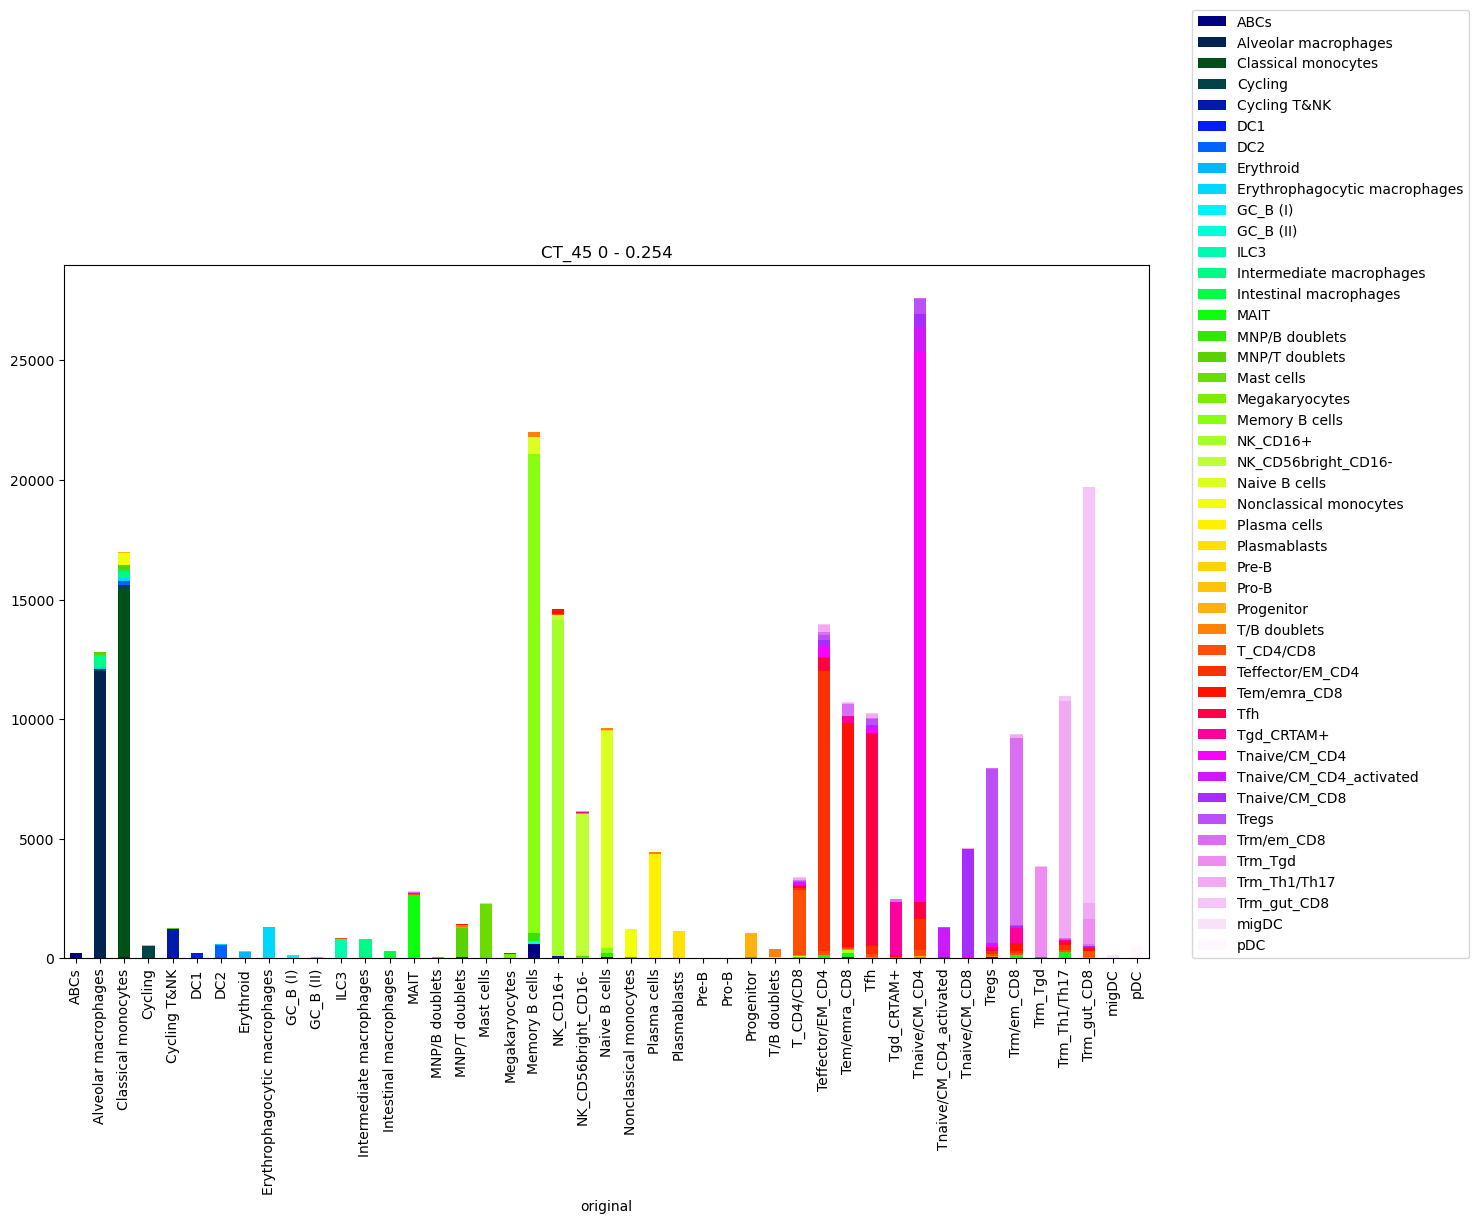

In [18]:
make_stacked_barplot(orig= pred_adatact.obs["Manually_curated_celltype"], pred = predictions_ct.predicted_labels["predicted_labels"], title = "CT_45 0 - 0.254" )

#### Glasner Data

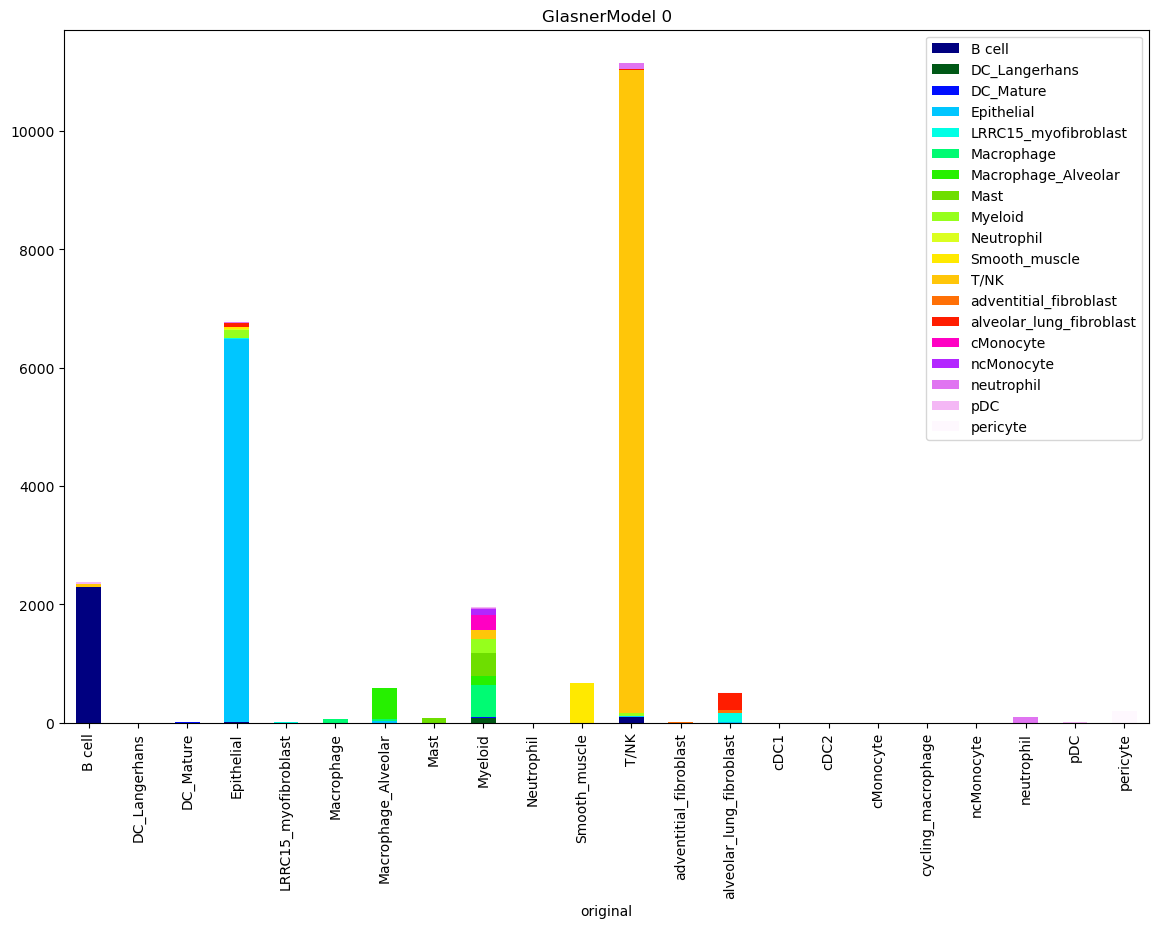

In [70]:
make_stacked_barplot(orig= pred_adatag_0.obs["finer_cell_types"], pred = predictions_g_0.predicted_labels["predicted_labels"], title = "Glasner Model 0 - 0.254" )

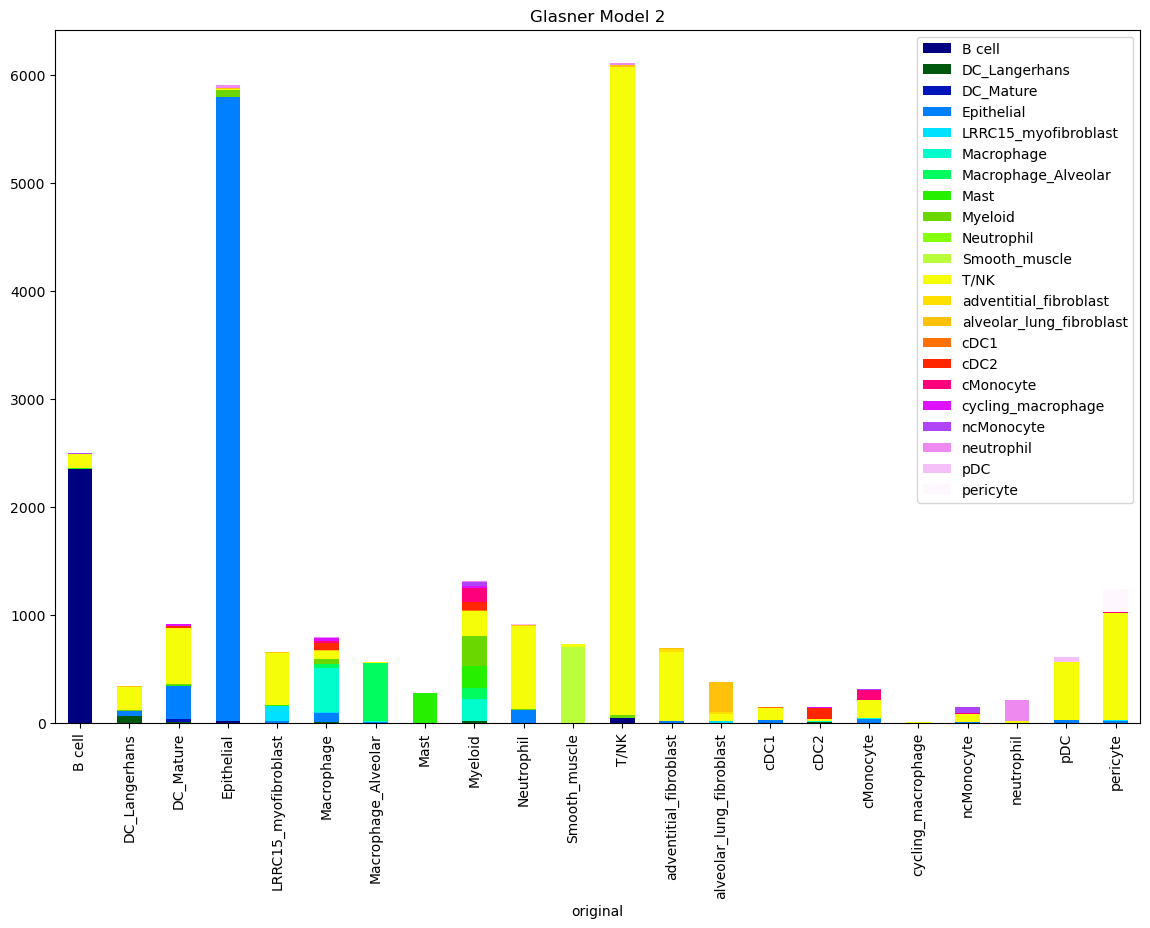

In [71]:
make_stacked_barplot(orig= pred_adatag_2.obs["finer_cell_types"], pred = predictions_g_2.predicted_labels["predicted_labels"], title = "Glasner Model 2 - 0.396" )

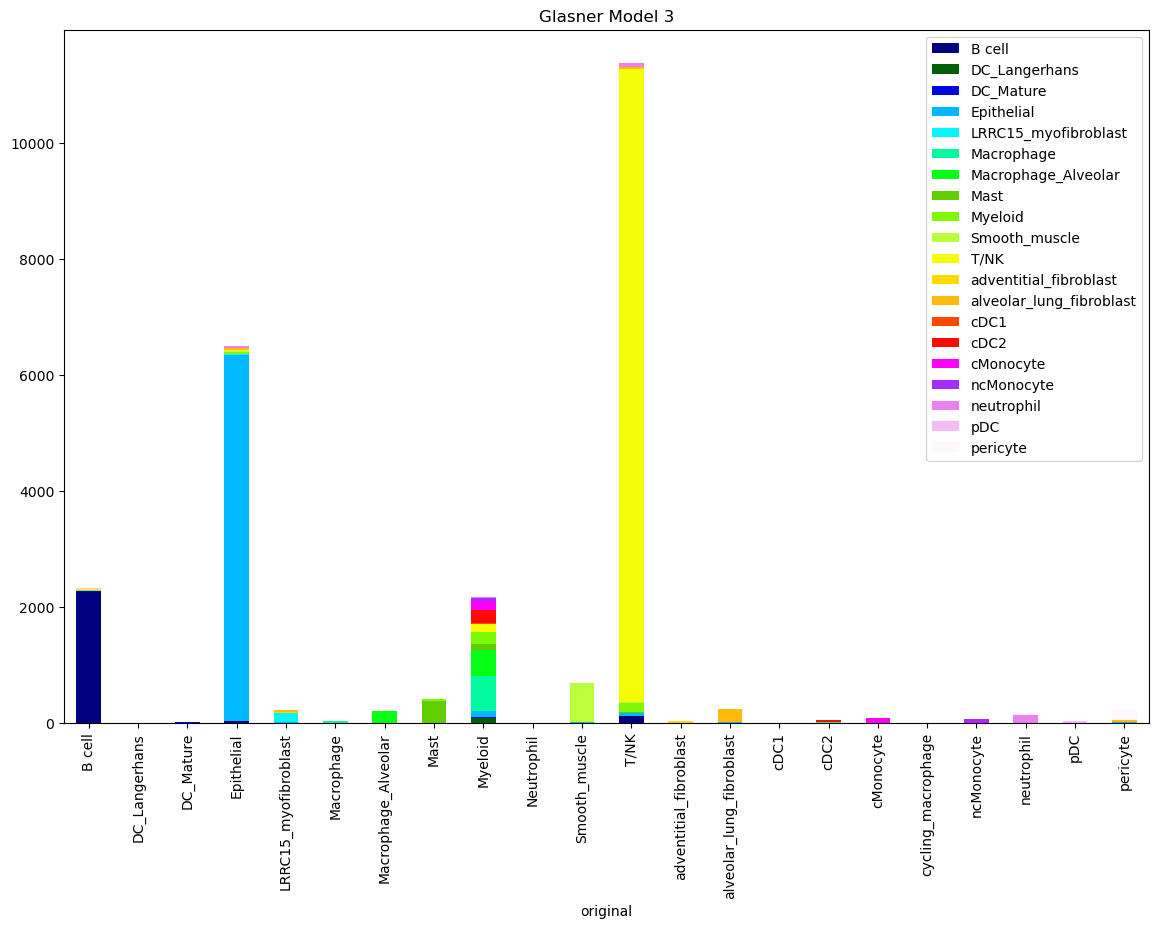

In [72]:
make_stacked_barplot(orig= pred_adatag_3.obs["finer_cell_types"], pred = predictions_g_3.predicted_labels["predicted_labels"], title = "Glasner Model 3 - 0.597" )

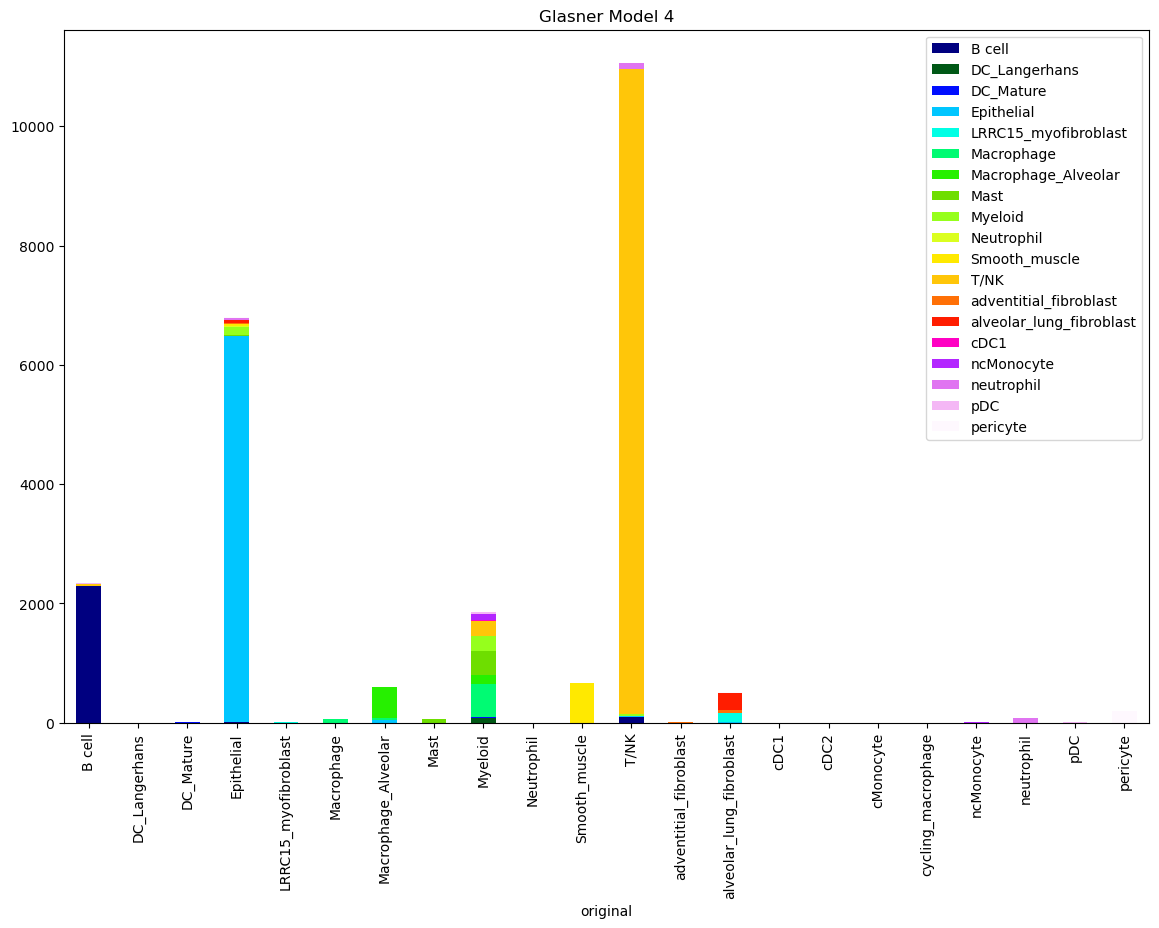

In [73]:
make_stacked_barplot(orig= pred_adatag_4.obs["finer_cell_types"], pred = predictions_g_4.predicted_labels["predicted_labels"], title = "Glasner Model 4 - 0.215" )

### Nested Sankey

In [14]:
def assign_nums(df, base_num, col, idx, new_col, index_dict: Optional[dict]  = None, make_dict: bool = True):
    index_list = []
    index = int(base_num)
    if make_dict:
        for x in np.unique(df[col]):
            index_list.append([x,index])
            index = int(index + 1)
        index_dict = dict(index_list)
        print(index_dict)
    df[new_col] = np.nan
    for i, row in df.iterrows(): 
        if idx == 1: 
            cell_type = df.at[i,col]
        elif idx == 2: 
            cell_type = df.at[i,col]
        df.at[i,new_col] = int(index_dict[cell_type])

#### Glanser

In [8]:
def categorise_glanser(row, col_name):  
    if row[col_name] == 'adventitial_fibroblast' or row[col_name] == 'alveolar_lung_fibroblast' or row[col_name] == 'LRRC15_myofibroblast':
        return 'Fibroblast'
    elif row[col_name] == 'Myeloid' or row[col_name] == 'DC_Langerhans' or row[col_name] == 'DC_Mature' or row[col_name] == 'Macrophage' or row[col_name] == 'Macrophage_Alveolar'or row[col_name] == 'Mast'  or row[col_name] == 'Neutrophil' or row[col_name] == 'cDC1' or row[col_name] == 'cDC2'  or row[col_name] == 'cMonocyte' or row[col_name] == 'cycling_macrophage' or row[col_name] == 'ncMonocyte' or row[col_name] == 'neutrophil':
        return 'Myeloid'
    return row[col_name]

In [22]:
labels = ['B cell', 'Epithelial', 'Fibroblast', 'Myeloid', 'Smooth_muscle', 'T/NK', 'pDC', 'pericyte','B cell', 'DC_Langerhans', 'DC_Mature', 'Epithelial', 'LRRC15_myofibroblast', 'Macrophage', 'Macrophage_Alveolar', 'Mast', 'Myeloid', 'Neutrophil', 'Smooth_muscle', 'T/NK', 'adventitial_fibroblast', 'alveolar_lung_fibroblast', 'cDC1', 'cDC2', 'cMonocyte', 'cycling_macrophage', 'ncMonocyte', 'neutrophil', 'pDC', 'pericyte', 'B cell', 'DC_Langerhans', 'DC_Mature', 'Epithelial', 'LRRC15_myofibroblast', 'Macrophage', 'Macrophage_Alveolar', 'Mast', 'Myeloid', 'Neutrophil', 'Smooth_muscle', 'T/NK', 'adventitial_fibroblast', 'alveolar_lung_fibroblast', 'cMonocyte', 'ncMonocyte', 'neutrophil', 'pDC', 'pericyte']  

##### Model 0

In [9]:
predg_0_df = pred_adatag_0.obs

In [10]:
predg_0_df['acc_coarse'] = predg_0_df.apply(lambda row: categorise_glanser(row, col_name = 'finer_cell_types'), axis=1)
#predg_0_df['pred_coarse'] = predg_0_df.apply(lambda row: categorise_glanser(row, col_name = 'predicted_labels'), axis=1) #don't actually need rn 

In [11]:
predg_0_df = predg_0_df[[ 'acc_coarse', 'finer_cell_types','predicted_labels']]

In [12]:
acc = pd.DataFrame(predg_0_df.groupby(['acc_coarse', 'finer_cell_types'], as_index=False).size())

In [13]:
pred = pd.DataFrame(predg_0_df.groupby(['finer_cell_types', 'predicted_labels'],as_index=False).size())

In [15]:
assign_nums(acc, 0, 'acc_coarse', 1, 'acc_coarse_nums')

{'B cell': 0, 'Epithelial': 1, 'Fibroblast': 2, 'Myeloid': 3, 'Smooth_muscle': 4, 'T/NK': 5, 'pDC': 6, 'pericyte': 7}


In [16]:
assign_nums(acc, 8, 'finer_cell_types', 2, 'acc_finer_nums')

{'B cell': 8, 'DC_Langerhans': 9, 'DC_Mature': 10, 'Epithelial': 11, 'LRRC15_myofibroblast': 12, 'Macrophage': 13, 'Macrophage_Alveolar': 14, 'Mast': 15, 'Myeloid': 16, 'Neutrophil': 17, 'Smooth_muscle': 18, 'T/NK': 19, 'adventitial_fibroblast': 20, 'alveolar_lung_fibroblast': 21, 'cDC1': 22, 'cDC2': 23, 'cMonocyte': 24, 'cycling_macrophage': 25, 'ncMonocyte': 26, 'neutrophil': 27, 'pDC': 28, 'pericyte': 29}


In [17]:
finer_labels_dict = dict({'B cell': 8, 'DC_Langerhans': 9, 'DC_Mature': 10, 'Epithelial': 11, 'LRRC15_myofibroblast': 12, 'Macrophage': 13, 'Macrophage_Alveolar': 14, 'Mast': 15, 'Myeloid': 16, 'Neutrophil': 17, 'Smooth_muscle': 18, 'T/NK': 19, 'adventitial_fibroblast': 20, 'alveolar_lung_fibroblast': 21, 'cDC1': 22, 'cDC2': 23, 'cMonocyte': 24, 'cycling_macrophage': 25, 'ncMonocyte': 26, 'neutrophil': 27, 'pDC': 28, 'pericyte': 29})
assign_nums(pred, 8, 'finer_cell_types', 1, 'acc_finer_nums', finer_labels_dict, make_dict = False)

In [18]:
assign_nums(pred, 30, 'predicted_labels', 2, 'pred_finer_nums')

{'B cell': 30, 'DC_Langerhans': 31, 'DC_Mature': 32, 'Epithelial': 33, 'LRRC15_myofibroblast': 34, 'Macrophage': 35, 'Macrophage_Alveolar': 36, 'Mast': 37, 'Myeloid': 38, 'Neutrophil': 39, 'Smooth_muscle': 40, 'T/NK': 41, 'adventitial_fibroblast': 42, 'alveolar_lung_fibroblast': 43, 'cMonocyte': 44, 'ncMonocyte': 45, 'neutrophil': 46, 'pDC': 47, 'pericyte': 48}


In [19]:
source = acc['acc_coarse_nums'].tolist()
source.extend(pred['acc_finer_nums'].tolist())

In [20]:
target = acc['acc_finer_nums'].tolist()
target.extend(pred['pred_finer_nums'].tolist())

In [21]:
count = acc['size'].tolist()
count.extend(pred['size'].tolist())

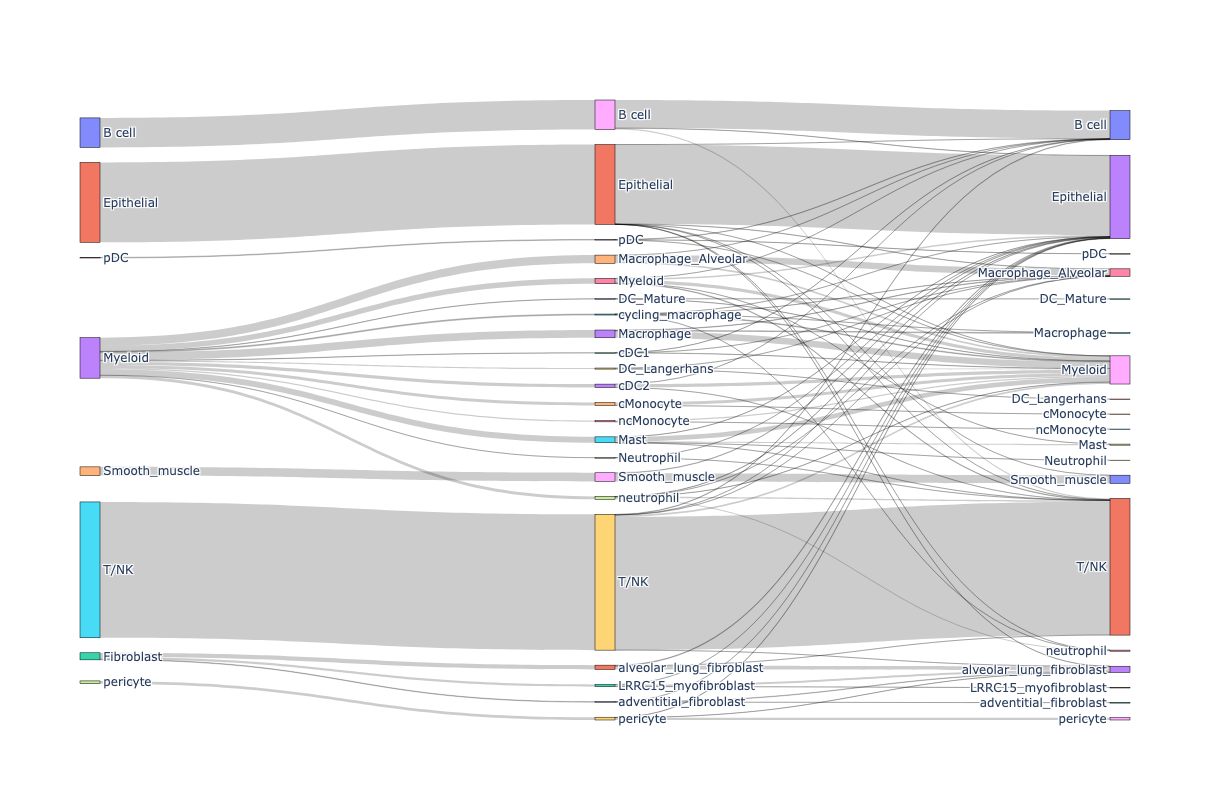

In [28]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels
    ),
    link = dict(
      source = source, 
      target = target,
      value = count
  ))])


fig.update_layout(
    autosize=False,
    width=1300,
    height=800)